In [22]:
# abs((Tau - t) / Tau)  if 0 <= t <= Tau
# 0 - if Tau <= t <= T

import numpy as np

param_T = 2
param_Tau = 0.5 * param_T

high_res = 1000
low_res = 4
Fb = 100

def f(t, Tau = param_Tau, T = param_T):
    return np.piecewise(
        t,
        [t < 0, (0 <= t) & (t <= Tau), (Tau <= t) & (t <= T), t > T],
        [0, lambda t: abs((Tau - t) / Tau), 0, 0],
    )
# аналоговый сигнал
def s(t, F_n, Fb, T):
    sum = 0
    for i in range(len(F_n)):
        sum += F_n[i] * np.sinc(Fb * (t - i * T))
    return sum


x_high_res = np.linspace(0, param_T, high_res)
x_low_res = np.linspace(0, param_T, low_res)

f_high_res = f(x_high_res)
f_low_res = f(x_low_res)

# 1 / high_res - шаг дискретизации
# 1 / low_res - шаг дискретизации
s_high_res = s(x_high_res, f_low_res, Fb, 1 / high_res)
s_low_res = s(x_low_res, f_low_res, Fb, 1 / low_res)

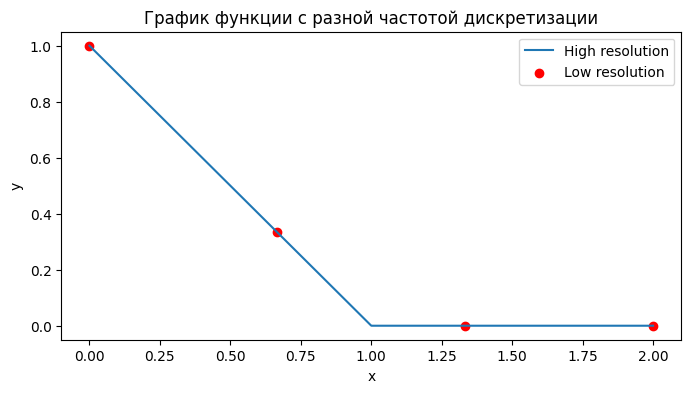

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(x_high_res, f_high_res, label="High resolution")

plt.scatter(x_low_res, f_low_res, label="Low resolution", color="red")

plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.title("График функции с разной частотой дискретизации")

plt.show()

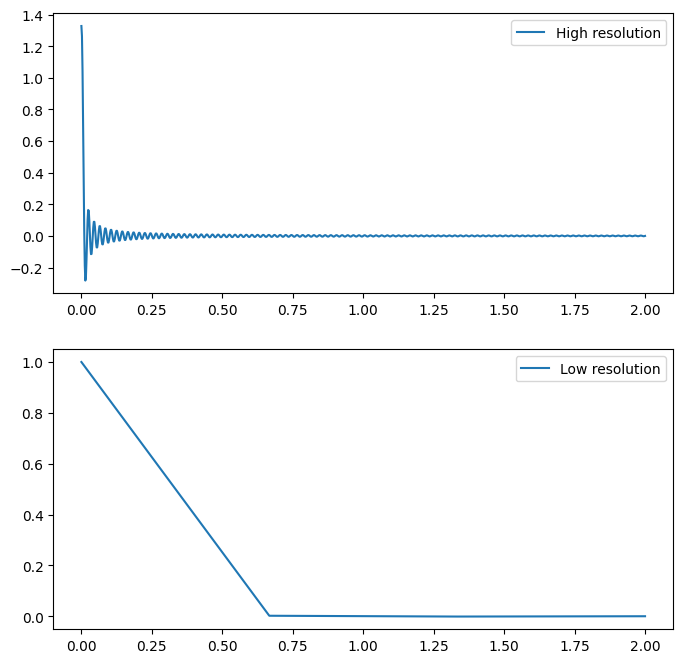

In [24]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].plot(x_high_res, s_high_res, label="High resolution")
axs[1].plot(x_low_res, s_low_res, label="Low resolution")
axs[0].legend()
axs[1].legend()

In [25]:
err = np.linalg.norm(f_high_res - s_high_res) / np.linalg.norm(f_high_res)
print(err)

0.9916004902655569


In [26]:
err = np.linalg.norm(f_low_res - s_low_res) / np.linalg.norm(f_low_res)
print(err)

0.314399266074539
